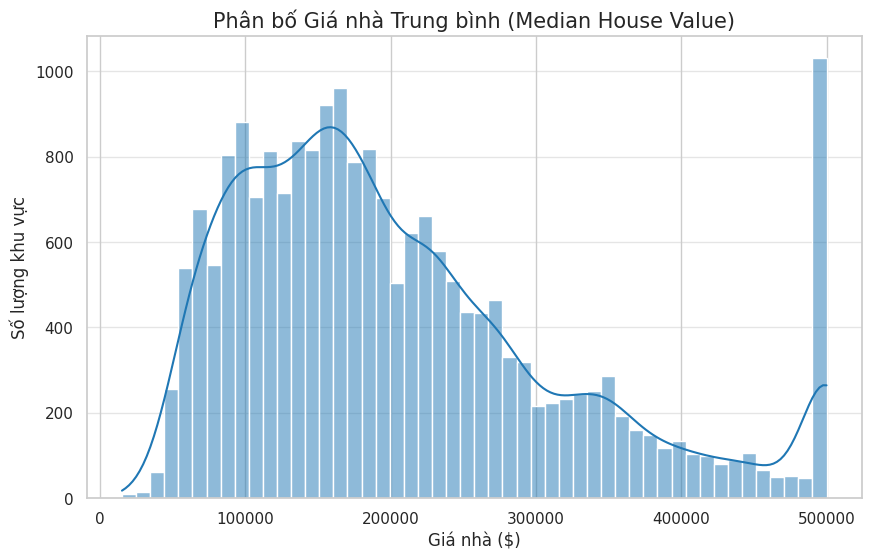

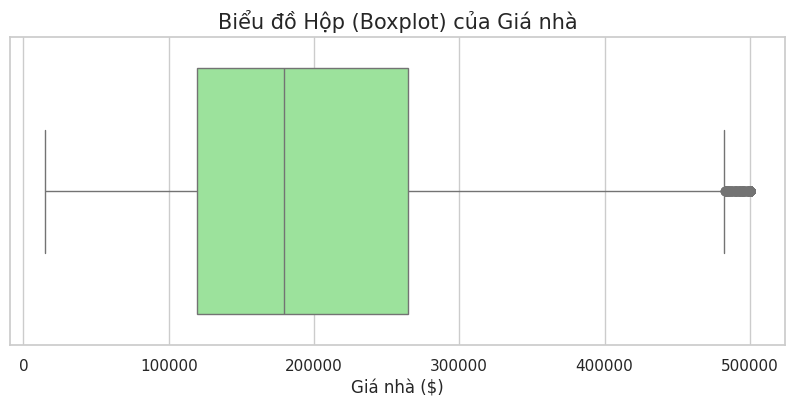

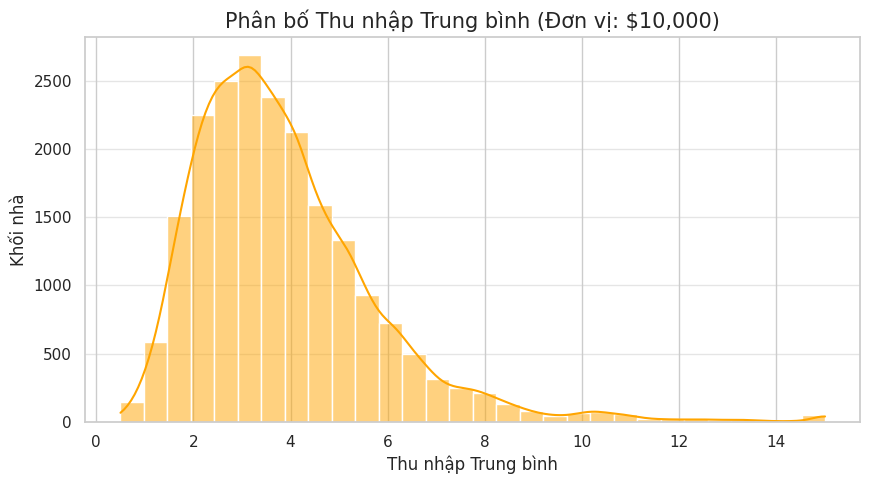

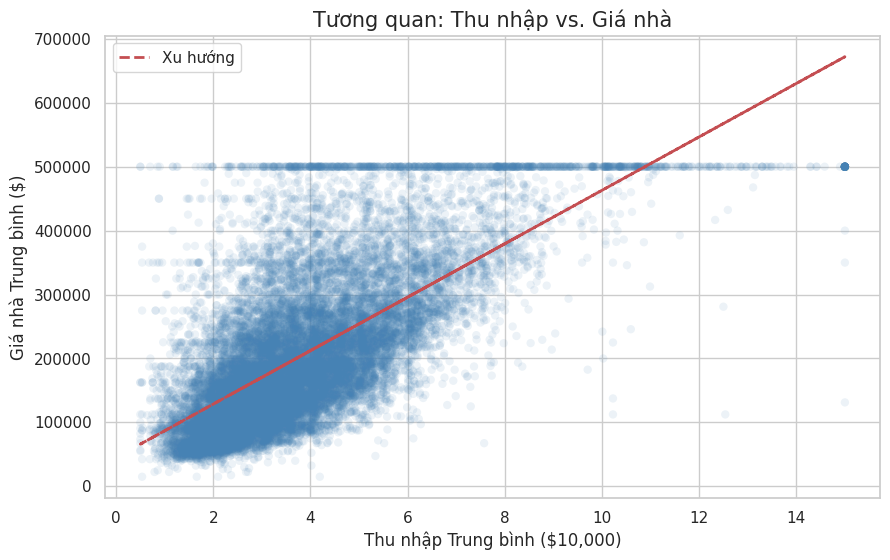

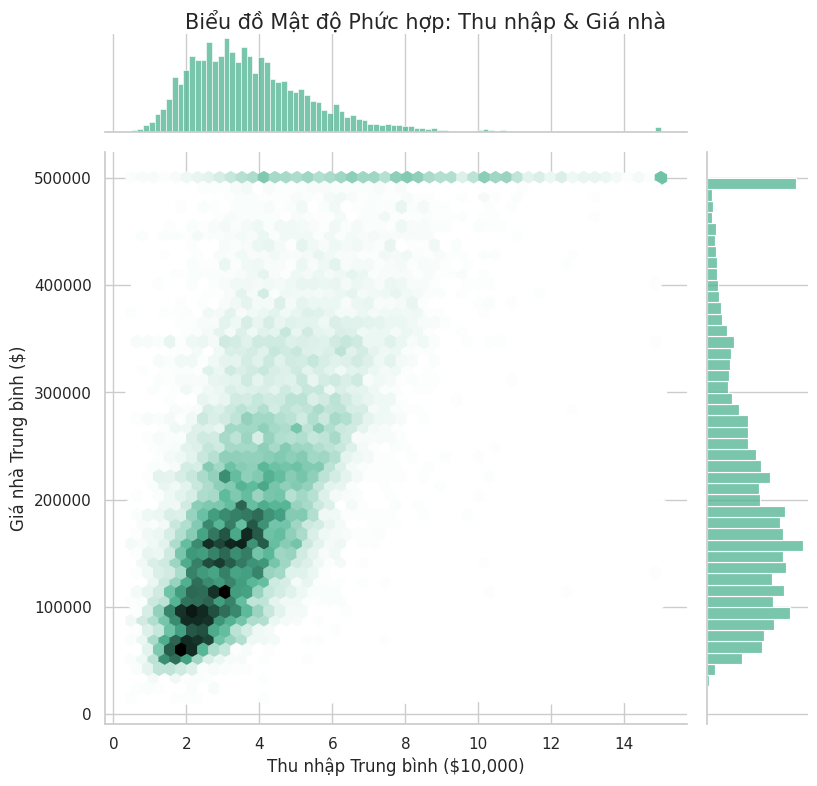

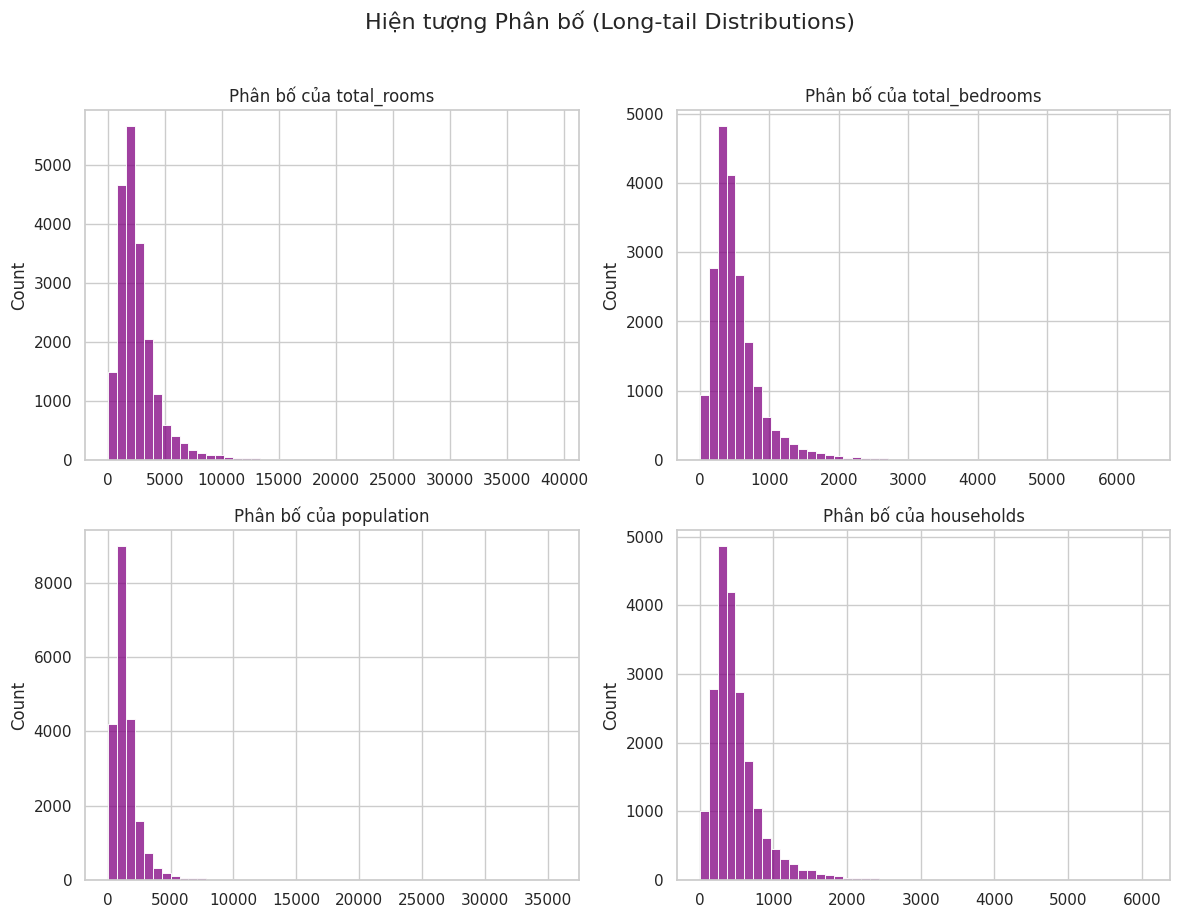

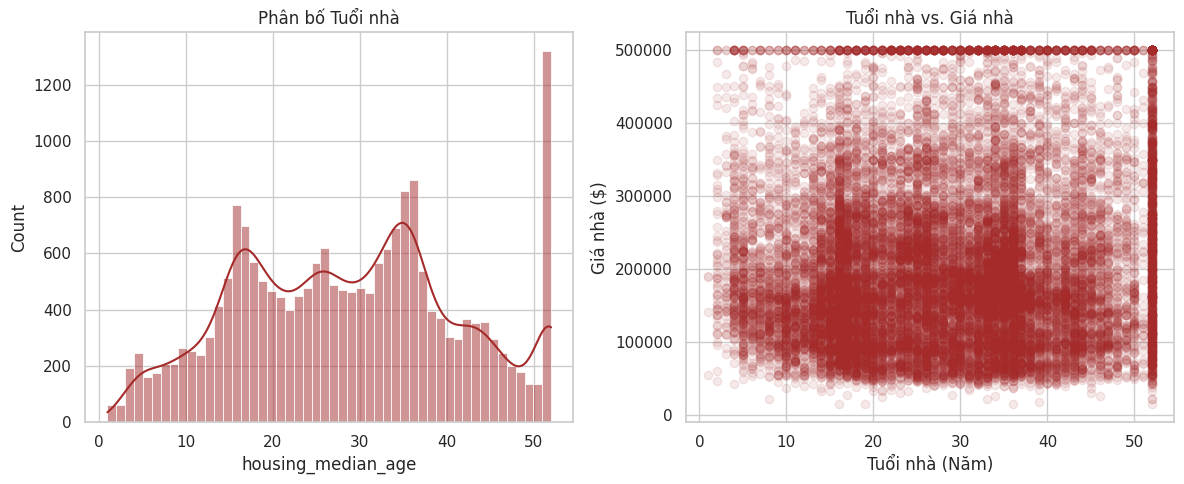

Tuổi nhà lớn nhất trong dữ liệu: 52 năm
Số lượng khu vực có tuổi nhà = 52: 1273


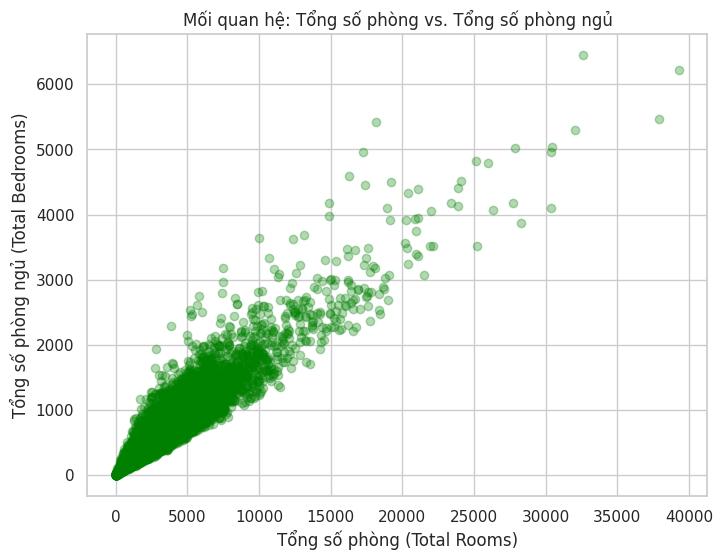

Hệ số tương quan giữa Rooms và Bedrooms: 0.9304


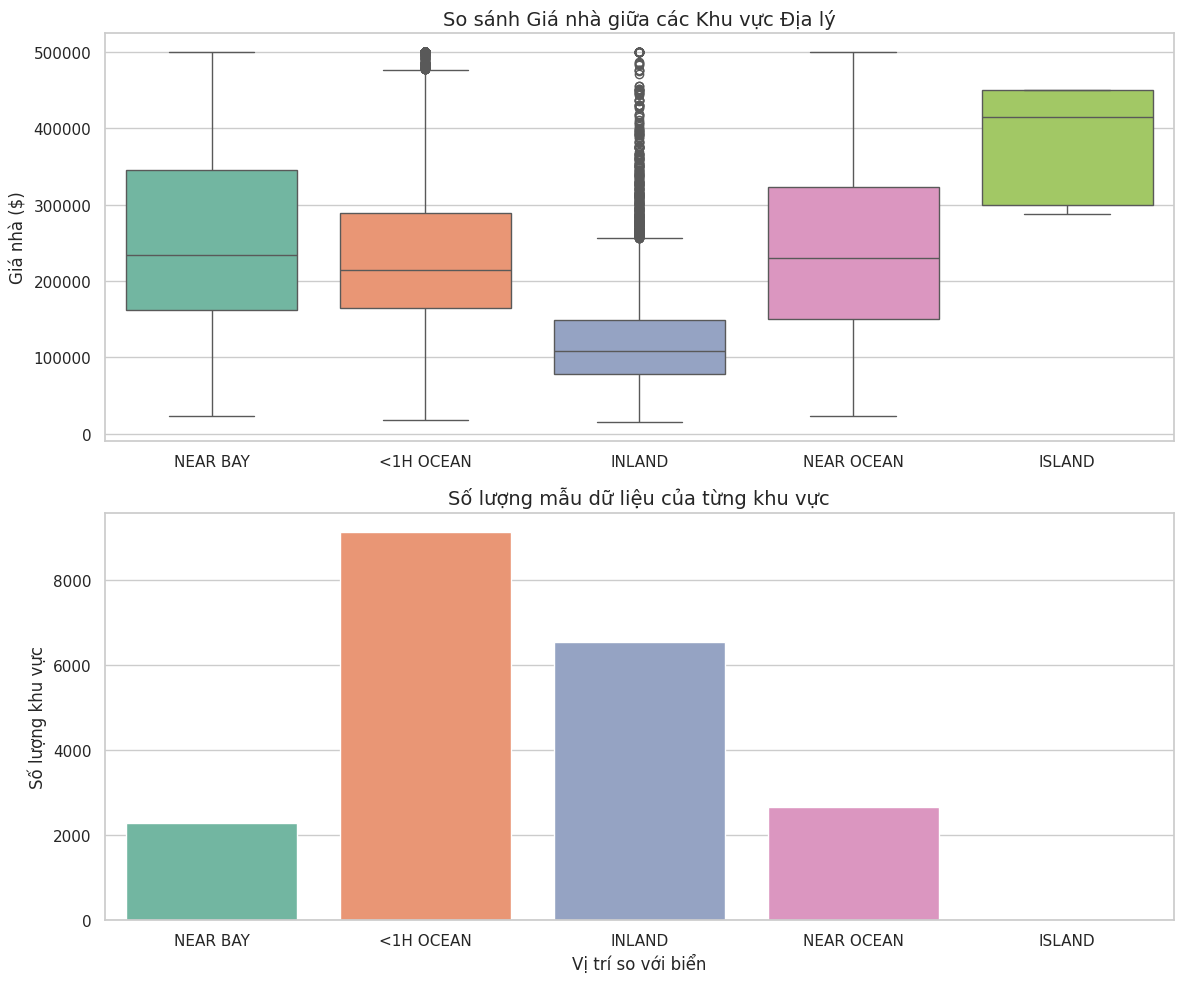

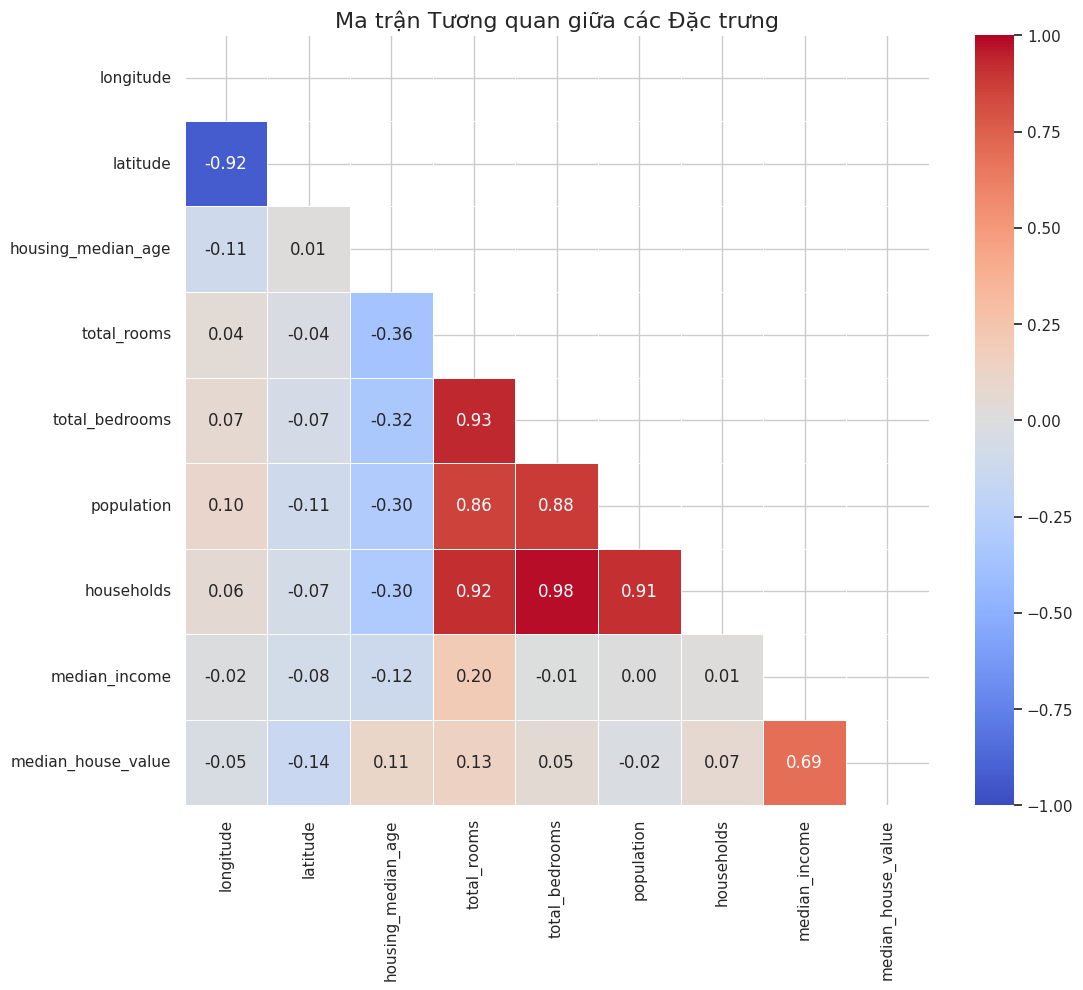

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/content/housing.csv')

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(10, 6))

# Vẽ Histogram kết hợp đường mật độ (KDE)
sns.histplot(df['median_house_value'], bins=50, kde=True, color='#1f77b4')

plt.title('Phân bố Giá nhà Trung bình (Median House Value)', fontsize=15)
plt.xlabel('Giá nhà ($)', fontsize=12)
plt.ylabel('Số lượng khu vực', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()

plt.figure(figsize=(10, 4))

# Vẽ Boxplot nằm ngang
sns.boxplot(x=df['median_house_value'], color='lightgreen')

plt.title('Biểu đồ Hộp (Boxplot) của Giá nhà', fontsize=15)
plt.xlabel('Giá nhà ($)')
plt.show()

plt.figure(figsize=(10, 5))

# Vẽ Histogram cho thu nhập
sns.histplot(df['median_income'], bins=30, kde=True, color='orange')

plt.title('Phân bố Thu nhập Trung bình (Đơn vị: $10,000)', fontsize=15)
plt.xlabel('Thu nhập Trung bình', fontsize=12)
plt.ylabel('Khối nhà', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()

plt.figure(figsize=(10, 6))

# Vẽ Scatter Plot với độ mờ (alpha) để thấy mật độ dữ liệu
plt.scatter(x=df['median_income'], y=df['median_house_value'],
            alpha=0.1, c='steelblue', edgecolors='none')

plt.title('Tương quan: Thu nhập vs. Giá nhà', fontsize=15)
plt.xlabel('Thu nhập Trung bình ($10,000)', fontsize=12)
plt.ylabel('Giá nhà Trung bình ($)', fontsize=12)

# Vẽ đường xu hướng (Trendline) đơn giản để thấy rõ hướng đi lên
z = np.polyfit(df['median_income'], df['median_house_value'], 1)
p = np.poly1d(z)
plt.plot(df['median_income'], p(df['median_income']), "r--", linewidth=2, label='Xu hướng')

plt.legend()
plt.show()

# Vẽ Jointplot để thấy chi tiết phân bố biên và tương quan
joint_plot = sns.jointplot(x='median_income', y='median_house_value', data=df,
                           kind='hex', color='#4CB391', height=8)

# Đặt lại tên trục cho rõ ràng
joint_plot.set_axis_labels('Thu nhập Trung bình ($10,000)', 'Giá nhà Trung bình ($)', fontsize=12)
plt.subplots_adjust(top=0.95)
joint_plot.fig.suptitle('Biểu đồ Mật độ Phức hợp: Thu nhập & Giá nhà', fontsize=15)
plt.show()

# Danh sách các cột cần kiểm tra phân bố
cols_to_plot = ['total_rooms', 'total_bedrooms', 'population', 'households']

# Tạo khung vẽ 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, col in enumerate(cols_to_plot):
    row, col_idx = divmod(i, 2)
    # Vẽ histogram
    sns.histplot(df[col].dropna(), bins=50, ax=axes[row, col_idx], color='purple')
    axes[row, col_idx].set_title(f'Phân bố của {col}', fontsize=12)
    axes[row, col_idx].set_xlabel('')

plt.suptitle('Hiện tượng Phân bố (Long-tail Distributions)', fontsize=16)
plt.show()

plt.figure(figsize=(12, 5))

# Biểu đồ 1: Phân bố tuổi nhà
plt.subplot(1, 2, 1)
sns.histplot(df['housing_median_age'], bins=50, color='brown', kde=True)
plt.title('Phân bố Tuổi nhà')

# Biểu đồ 2: Quan hệ Tuổi nhà vs Giá nhà
plt.subplot(1, 2, 2)
plt.scatter(df['housing_median_age'], df['median_house_value'], alpha=0.1, color='brown')
plt.title('Tuổi nhà vs. Giá nhà')
plt.xlabel('Tuổi nhà (Năm)')
plt.ylabel('Giá nhà ($)')

plt.tight_layout()
plt.show()

# Kiểm tra số lượng bị chặn trần ở mức tối đa (thường là 52)
max_age = df['housing_median_age'].max()
print(f"Tuổi nhà lớn nhất trong dữ liệu: {max_age} năm")
print(f"Số lượng khu vực có tuổi nhà = {max_age}: {df[df['housing_median_age'] == max_age].shape[0]}")

plt.figure(figsize=(8, 6))

plt.scatter(df['total_rooms'], df['total_bedrooms'], alpha=0.3, c='green')
plt.title('Mối quan hệ: Tổng số phòng vs. Tổng số phòng ngủ')
plt.xlabel('Tổng số phòng (Total Rooms)')
plt.ylabel('Tổng số phòng ngủ (Total Bedrooms)')
plt.grid(True)
plt.show()

# Tính hệ số tương quan
corr_rooms_bed = df['total_rooms'].corr(df['total_bedrooms'])
print(f"Hệ số tương quan giữa Rooms và Bedrooms: {corr_rooms_bed:.4f}")

plt.figure(figsize=(12, 10))

# Biểu đồ 1: Hộp so sánh giá
plt.subplot(2, 1, 1)
# Đã thêm hue và legend=False để sửa cảnh báo
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df, hue='ocean_proximity', legend=False, palette='Set2')
plt.title('So sánh Giá nhà giữa các Khu vực Địa lý', fontsize=14)
plt.xlabel('')
plt.ylabel('Giá nhà ($)')

# Biểu đồ 2: Đếm số lượng mẫu
plt.subplot(2, 1, 2)
# Đã thêm hue và legend=False để sửa cảnh báo
sns.countplot(x='ocean_proximity', data=df, hue='ocean_proximity', legend=False, palette='Set2')
plt.title('Số lượng mẫu dữ liệu của từng khu vực', fontsize=14)
plt.xlabel('Vị trí so với biển')
plt.ylabel('Số lượng khu vực')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))

# Tính toán ma trận tương quan (chỉ dùng các cột số)
corr_matrix = df.corr(numeric_only=True)

# Tạo mask để che nửa trên tam giác (cho đỡ rối)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Vẽ Heatmap
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f",
            cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

plt.title('Ma trận Tương quan giữa các Đặc trưng', fontsize=16)
plt.show()